# Entrenando Modelos

## Regresión Lineal

### Ecuación Normal

Para encontrar el valor de $\theta$ que minimiza la función de costo, se puede usar el método de la ecuación normal.

$\hat{\theta} = \left( \textbf{X}^{T} \cdot \textbf{X}\right)^{-1}\cdot \textbf{X}^{T} \cdot \textbf{y} $

en donde $\hat{\theta}$ es el valor de los parámetros $\theta$ que minimizan la función de costo y $\textbf{y}$ es el vector de valores objetivo.

Se genera un set de puntos agregándoles un poco de ruido para posteriormente hacer una regresión lineal usando la ecuación normal.

In [1]:
import numpy as np 

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 3.62588976],
       [ 3.37453441]])

<IPython.core.display.Javascript object>


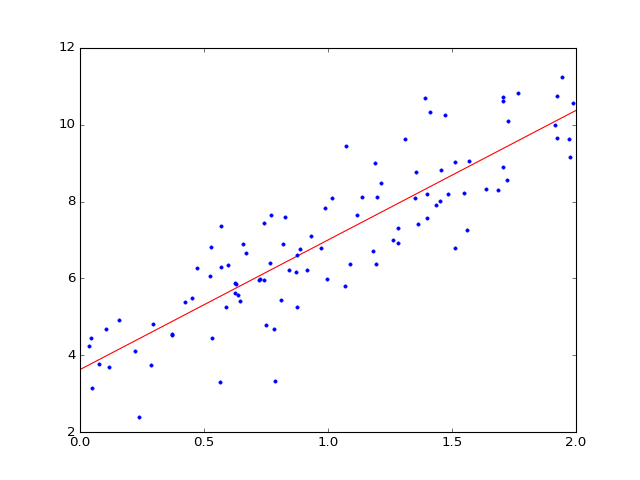

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

import matplotlib.pyplot as plt
%matplotlib notebook 

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')

Se debe tener en cuenta que el método de la ecuación normal es depende de invertir una matriz. Invertir una matriz tiene una complejidad computacional $O(n^{3})$. Esto hace que este método sea muy lento para sets de datos que tengan gran número de variables. Sin embargo, la linealidad del método hace que este método maneje sets con gran número de instancias de forma eficiente.

## Gradient Descent

La idea del gradient descent es encontrar el mínimo de la función de costo avanzando hacia la dirección en la que el gradiente (el cambio) sea el mayor posible en la dirección descendente. El proceso se repite hasta lograr convergencia en un valor mínimo.

**Nota:** Para asegurarse que gradient descent funcionará de forma óptima, es conveniente escalar las variables del set de datos. De lo contrario, el algoritmo tomará más tiempo en converger.

### Batch Gradient Descent

El método de Batch Gradient Descent calcula el gradiente de la función de costo usando todo el set de datos. El uso del set de datos completos hace que este algoritmo sea lento para sets de entrenamiento grandes. Como el objetivo es encontrar el grupo de parámetros $\theta$ que optimice la función de costo, la derivada parcial de la función se hace respecto a todos los parámetros $\theta_{j}$. Una vez se encuentra el gradiente respecto a todos los parámetros $\theta$, se resta este gradiente al valor actual de $\theta$. De esta manera se llega poco a poco al valor ideal de los parámetros del modelo.

$\theta^{(\text{nuevo})} = \theta - \eta \nabla_{\theta}\text{MSE}(\theta)$

En la ecuación anterior, $\eta$ es el factor de aprendizaje (learning rate). Este parámetro regula que tan grande es el paso para cada iteración en la búsqueda de los parámetros óptimos. Si el paso es muy pequeño, ie. $\eta$ es pequeño, el modelo tardará mucho en converger. Por el contrario, si $\eta$ es muy grande, el algoritmo se saltará el mínimo de la función.

A continuación está una implementación de Batch Gradient Descent para una regresión lineal inicializando los parámetros $\theta$ de forma aleatoria. (Se debe tener en cuenta que en la implemntación se calculó la derivada de la función de costo de forma analítica.)

In [8]:
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

El valor apropiado para $\eta$ se puede escoger usando un Grid Search. Además se debe escoger un número adecuado de iteraciones para que el modelo no tarde mucho en converger. Por lo general, se define un valor de tolerancia (diferente de cero pero pequeño) para la norma del vector gradiente. Cuando se llegue a ese valor, se detienen la iteraciones del Gradient Descent, ya que se ha llegado tan cerca como se quiere a optimizar la función de costo.

Por lo general, Batch Gradient Descent tiene una tasa de convergencia inversamente del orden de $O\left(\frac{1}{\text{iteraciones}}\right)$. Es decir, si se quiere tener una tolerancia 10 veces menor, se deberán correr 10 veces más iteraciones.

### Stochastic Gradient Descent

Para solucionar el problema de Batch Gradient Descent al usar todo el set de datos, se plantean soluciones como el Stochastic Gradient Descent. El enfoque de este método es escoger una instancia del set de datos de forma aleatoria para calcular el gradiente. Como se están usando un menor número de instancias, este método es considerablemente más rápido que Batch Gradient Descent para sets de datos grandes.

Sin embargo, dada la naturaleza estocástica del algoritmo, no seguirá un camino recto hacia el mínimo de la función. Por el contrario, dará saltos alrededor del espacio de parámetros hasta llegar muy cerca al mínimo de la función. Es por esto que el Stochastic Gradient Descent encuentra valores buenos de $\theta$ pero no óptimos.

Una ventaja adicional que tiene el Stochastic Gradient Descent es que, para funciones de costo irregulares, puede saltar mínimos locales. Esto hace que Stochastic Gradient Descent tenga más opciones de encontrar el mínimo global que el Batch Gradient Descent. 

Una solución para que el algortimo no empiece a saltar de un lado a otro cuando está cerca del mínimo global es ir reduciendo gradualmente la tasa de aprendizaje $\eta$. De esta manera se logra que al principio de la iteraciones se tengan pasos grandes pero, a medida que el camino se acerca al mínimo, los pasos van reduciendo su tamaño. Este método se denomina aprendizaje programado (learning schedule).

A continuación está una implementación de Stochastic Gradient Descent usando aprendizaje programado.

In [10]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta*gradients

Este algoritmo también se puede implementar usando Scikit-Learn con 50 epochs y usando el aprendizaje programado por defecto.

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter=50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

### Mini-batch Gradient Descent

Mini-batch gradient descent es el punto medio entre los dos métodos anteriores. En vez de escoger el set de datos completo comom en Batch Gradient Descent, o escoger solo una instancia como en Stochastic Gradient Descent, este método escoge un grupo pequeño de instancias llamado mini-batch. 

## Regresión Polinómica

Los modelos lineales se pueden usar para hacer regresiones de modelos no lineales usando regresión polinómica. Este método consiste en agregar como variables potencias de las variables originales.

In [13]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

La forma óptima de agregar potencias de las variables originales es usar la clase de Scikit-Learn `PolynomialFeatures`. El set resultante de la transformación es la variable original y su cuadrado.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.02308642]), array([[ 1.08439128,  0.49816604]]))